# (10주차) 5월4일 -- draft

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### 로지스틱 모형 (1) 

`-` 스칼라버전

$y_i \propto b + w_1 x_{1,i} + \dots + w_{784}x_{784,i} $

$y_i \approx \text{sigmoid}(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})= \frac{\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})}{1+\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})} $

`-` 벡터버전

${\boldsymbol y} \propto {\bf X}{\bf W} + b$ 

- ${\bf X}$: (n,784) matrix 
- ${\boldsymbol y}$: (n,1) matrix
- ${\bf W}$: (784,1) matrix
- $b$: (1,1) matrix
- `+` 는 브로드캐스팅

${\boldsymbol y} \approx \text{sigmoid}({\bf X}{\bf W} + b) = \frac{\exp({\bf XW} +b)}{1+\exp({\bf XW} +b)}$ 

- `+`, `exp`는 브로드캐스팅 

`-` $\boldsymbol{y}$를 설명하는 본질: ${\bf X}{\bf W}+ b$이 값이 큰 row 일수록 대응하는 $\boldsymbol{y}$의 row 값은 1

### 로지스틱의 모형 (2) 

`-` 또 다른 모형 

${\bf Y} \propto {\bf X}{\bf W} + {\boldsymbol b}$ 

- ${\bf X}$: (n,784) matrix 
- ${\bf Y}$: (n,2) matrix
- ${\bf W}$: (784,2) matrix
- ${\boldsymbol b}$: (1,2) matrix
- `+` 는 브로드캐스팅

$[{\boldsymbol y}_1 ~ {\boldsymbol y}_2] \propto  {\bf X} [{\bf W}_1 {\bf W}_2] + [b_1 ~ b_2]= [ {\bf X}{\bf W}_1  ~ {\bf X}{\bf W}_2] + [b_1 ~ b_2]$

${\boldsymbol y}_1 \propto  {\bf X} {\bf W}_1 + b_1 \\ {\boldsymbol y}_2 \propto  {\bf X} {\bf W}_2 + b_2$ 


`-` 본질? ${\bf X}{\bf W}_1 +b_1$이 큰 row 일 수록 대응하는 $\boldsymbol{y}_1$의 row 값이 1이다. 또한 ${\bf X}{\bf W}_2 +b_2$이 큰 row 일 수록 대응하는 $\boldsymbol{y}_2$의 row 값이 1이다. 

`-` 질문: ${\bf X}{\bf W}_1 +b_1$의 값이 500인 row가 있고, 그때 대응하는 ${\bf X}{\bf W}_2 +b_2$의 값은 200이라면? 대응하는 $\boldsymbol{y}_1, \boldsymbol{y}_2$의 row값은 어떠한가? 
- [0,0]
- [0,1]
- [1,0]
- [1,1]

`-` 활성화함수 

$[{\boldsymbol y}_1 ~ {\boldsymbol y}_2] \propto {\bf X}{\bf W} + \boldsymbol{b} = [ {\bf X}{\bf W}_1+b_1  ~ {\bf X}{\bf W}_2 +b_2] $ 

$[{\boldsymbol y}_1 ~ {\boldsymbol y}_2] \approx  \big[ \frac{\exp({\bf X}{\bf W}_1+b_1)}{\exp({\bf X}{\bf W}_1+b_1)+\exp({\bf X}{\bf W}_2+b_2)}  ~~ \frac{\exp({\bf X}{\bf W}_2+b_2)}{\exp({\bf X}{\bf W}_1+b_1)+\exp({\bf X}{\bf W}_2+b_2)}  \big] $ 

${\boldsymbol y} \approx \text{softmax}({\bf X}{\bf W} + {\boldsymbol b})$ 

### 모형의 비교

`-` 수식장난 
$$\frac{\exp(\beta_0+\beta_1 x_i)}{1+\exp(\beta_0+\beta_1x_i)}=\frac{\exp(\beta_0+\beta_1 x_i)}{e^0+exp(\beta_0+\beta_1x_i)}$$

`-` 통찰 
- 모형2: ${\bf X}{\bf W}_1 +b_1$ 와 ${\bf X}{\bf W}_2 +b_2$ 의 크기를 비교하고 확률 결정
- 모형1: ${\bf X}{\bf W} +b$와 $0$의 크기를 비교하고 확률 결정 (${\bf X}{\bf W} +b$의 row값이 양수이면 1로 예측하고 음수이면 0으로 예측 

`-` 파라메터의 수 

`-` 표현력

- note: $\big(\frac{e^{300}}{e^{300}+e^{500}},\frac{e^{500}}{e^{300}+e^{500}}\big) =\big( \frac{e^{0}}{e^{0}+e^{200}}, \frac{e^{200}}{e^{0}+e^{200}}\big)$

`-` 확장성 

### 분류할 클래스가 2개 이상일 경우 신경망 모형의 설계 

`-` y의 모양 

`-` 활성화함수의 선택 

`-` 손실함수의 선택 

### Fashion_MNIST 다중분류 

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

`-` 시도1

In [17]:
X = x_train.reshape(-1,28*28)
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28*28)
yy = tf.keras.utils.to_categorical(y_test)

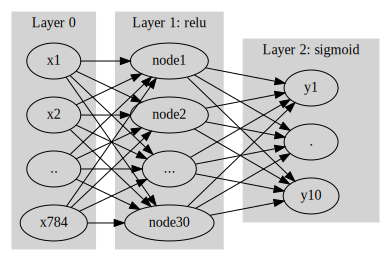

In [19]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "y10"
    "node2" -> "y10"
    "..." -> "y10"
    "node30" -> "y10"
    
    "node1" -> "y1"
    "node2" -> "y1"
    "..." -> "y1"
    "node30" -> "y1"
    
    "node1" -> "."
    "node2" -> "."
    "..." -> "."
    "node30" -> "."
    
    label = "Layer 2: sigmoid"
}
''')

In [67]:
#collapse_output
tf.random.set_seed(43052)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=20,batch_size=1200) 

Epoch 1/20
50/50 [==============================] - 0s 1ms/step - loss: 32.5636 - accuracy: 0.3732
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 2.4426 - accuracy: 0.3876
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 1.9157 - accuracy: 0.3830
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 1.7747 - accuracy: 0.4075
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 1.6499 - accuracy: 0.4506
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 1.5429 - accuracy: 0.4854
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 1.4646 - accuracy: 0.4987
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 1.3988 - accuracy: 0.5224
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 1.3393 - accuracy: 0.5462
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 1.2876 - accuracy: 0.5537
Epoch 11/20
50/50 

In [34]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 345us/step - loss: 1.0973 - accuracy: 0.6055


[1.0972779989242554, 0.6054999828338623]

`-` 시도2

In [44]:
#collapse_output
tf.random.set_seed(43052)
net_dnn = tf.keras.Sequential() 
net_dnn.add(tf.keras.layers.Dense(500,activation='relu'))
net_dnn.add(tf.keras.layers.Dense(500,activation='relu'))
net_dnn.add(tf.keras.layers.Dense(500,activation='relu'))
net_dnn.add(tf.keras.layers.Dense(10,activation='softmax'))
net_dnn.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net_dnn.fit(X,y,epochs=20,batch_size=1200) 

Epoch 1/20
50/50 [==============================] - 1s 9ms/step - loss: 21.2273 - accuracy: 0.6484
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 0.8976 - accuracy: 0.8034
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.6332 - accuracy: 0.8268
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.5325 - accuracy: 0.8411
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.8558
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.3942 - accuracy: 0.8694
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.3768 - accuracy: 0.8735
Epoch 8/20
50/50 [==============================] - 0s 8ms/step - loss: 0.3319 - accuracy: 0.8849
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 0.3122 - accuracy: 0.8901
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 0.2780 - accuracy: 0.9005
Epoch 11/20
50/50 

In [45]:
net_dnn.evaluate(XX,yy)

313/313 [==============================] - 0s 608us/step - loss: 0.4641 - accuracy: 0.8627


[0.4640596807003021, 0.8626999855041504]

`-` 시도3

In [57]:
_X = tf.constant(X.reshape(-1,28,28,1),dtype=tf.float64)
_XX = tf.constant(XX.reshape(-1,28,28,1),dtype=tf.float64)

In [62]:
#collapse_output
tf.random.set_seed(43052)
net_cnn = tf.keras.Sequential()
net_cnn.add(tf.keras.layers.Convolution2D(30,(5,5),activation='relu'))
net_cnn.add(tf.keras.layers.MaxPool2D())
net_cnn.add(tf.keras.layers.Convolution2D(30,(5,5),activation='relu'))
net_cnn.add(tf.keras.layers.MaxPool2D())
net_cnn.add(tf.keras.layers.Flatten())
net_cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
net_cnn.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy']) 
net_cnn.fit(_X,y,epochs=20,batch_size=1200) 

Epoch 1/20
50/50 [==============================] - 5s 92ms/step - loss: 6.2941 - accuracy: 0.5016
Epoch 2/20
50/50 [==============================] - 5s 92ms/step - loss: 0.9204 - accuracy: 0.7147
Epoch 3/20
50/50 [==============================] - 5s 92ms/step - loss: 0.6900 - accuracy: 0.7737
Epoch 4/20
50/50 [==============================] - 5s 92ms/step - loss: 0.5733 - accuracy: 0.8053
Epoch 5/20
50/50 [==============================] - 5s 91ms/step - loss: 0.5029 - accuracy: 0.8270
Epoch 6/20
50/50 [==============================] - 5s 91ms/step - loss: 0.4567 - accuracy: 0.8410
Epoch 7/20
50/50 [==============================] - 5s 92ms/step - loss: 0.4264 - accuracy: 0.8498
Epoch 8/20
50/50 [==============================] - 5s 91ms/step - loss: 0.4057 - accuracy: 0.8567
Epoch 9/20
50/50 [==============================] - 5s 91ms/step - loss: 0.3901 - accuracy: 0.8627
Epoch 10/20
50/50 [==============================] - 5s 91ms/step - loss: 0.3768 - accuracy: 0.8658
Epoch 11/

In [63]:
net_cnn.evaluate(_XX,yy)

313/313 [==============================] - 0s 978us/step - loss: 0.3915 - accuracy: 0.8639


[0.3914777934551239, 0.8639000058174133]

`-` 시도1,2,3 비교

In [68]:
net.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (1200, 30)                23550     
                                                                 
 dense_46 (Dense)            (1200, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [69]:
net_dnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 500)               392500    
                                                                 
 dense_31 (Dense)            (None, 500)               250500    
                                                                 
 dense_32 (Dense)            (None, 500)               250500    
                                                                 
 dense_33 (Dense)            (None, 10)                5010      
                                                                 
Total params: 898,510
Trainable params: 898,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
net_cnn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 30)          22530     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 480)               0         
                                                                 
 dense_44 (Dense)            (None, 10)              